## EDA | Feature Scaling | RFECV | PCA | KMeans | XGBoost

In [1]:
# Loading libraries

import numpy as np
import pandas as pd
import seaborn as sns; 
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the Dataset
wholesale = pd.read_csv('Wholesale customers data.csv')

### EDA and Cleaning

In [3]:
# Preview dataset
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Shape of dataset
wholesale.shape

(440, 8)

In [5]:
# Display complete information of the data frame
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Observations: 
* The dataset contains 440 instances and 8 attributes
* There are no missing values in any columns 
* All 8 attributes have numeric datatype

In [6]:
print(wholesale.Channel.unique())

[2 1]


In [7]:
print(wholesale.Region.unique())

[3 1 2]


* Channel column contains two unique values;  1 and 2.  
These two values classify the customers from two different channels as
1 for Horeca (Hotel/Retail/Café) customers and
2 for Retail channel (nominal) customers.
* Region column contains three unique values; 1, 2, and 3. 

In [8]:
# counting the number of samples belonging to each unique values in Channel and Region columns

print(wholesale['Channel'].value_counts())
print(wholesale['Region'].value_counts())

1    298
2    142
Name: Channel, dtype: int64
3    316
1     77
2     47
Name: Region, dtype: int64


##### Summary statistics

In [9]:
wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Correlation Analysis

In [10]:
wholesale.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


<AxesSubplot:>

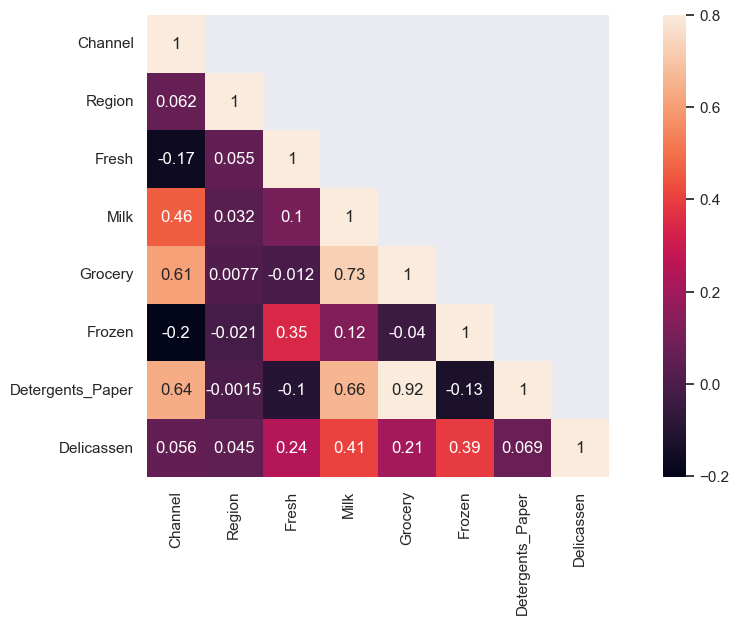

In [11]:
#correlation heatmap
corrMat = wholesale.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(14,6)
sns.heatmap(corrMat, mask=mask,vmax=.8, square=True,annot=True)

Observations: 
Strong correlation can be observed between,
* Grocery and Detergents_Paper : 0.92
* Milk and Grocery : 0.73
* Milk and Detergents_Paper : 0.66



#### Outliers

<AxesSubplot:>

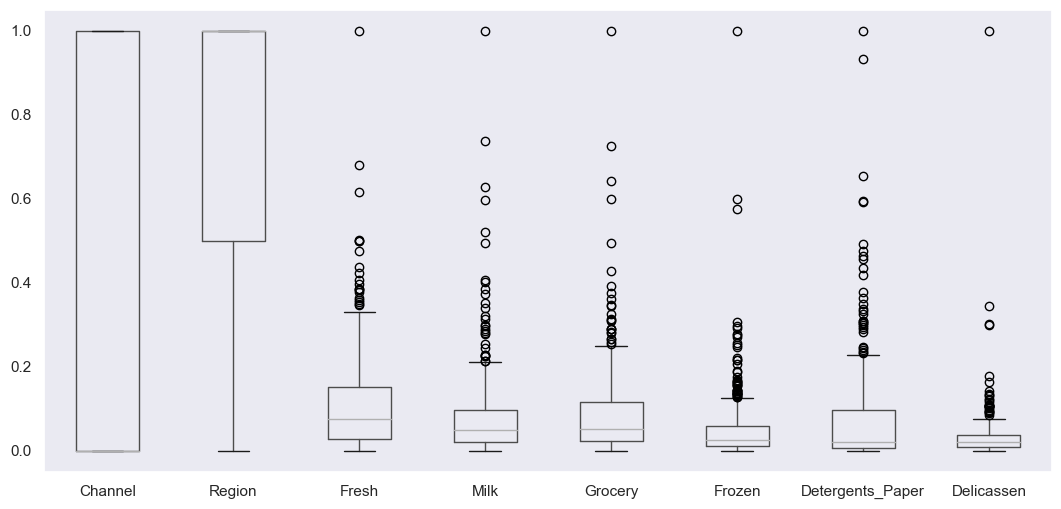

In [12]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(wholesale)
scaled_data = pd.DataFrame(scaled, columns = wholesale.columns)
fig = plt.figure(figsize = (13,6))
scaled_data.boxplot(column =[name for name in list(scaled_data)], grid=False) 

There are a few outliers in all feature columns except Channel and Region. But, here I'm proceeding without removing them or capping them.

## Feature Scaling

#### Standard Scalar

In [13]:
from sklearn.preprocessing import StandardScaler

scaled1 = StandardScaler().fit_transform(wholesale)

pd.DataFrame(scaled1, columns=wholesale.columns).head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [14]:
pd.DataFrame(scaled1, columns=wholesale.columns).describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


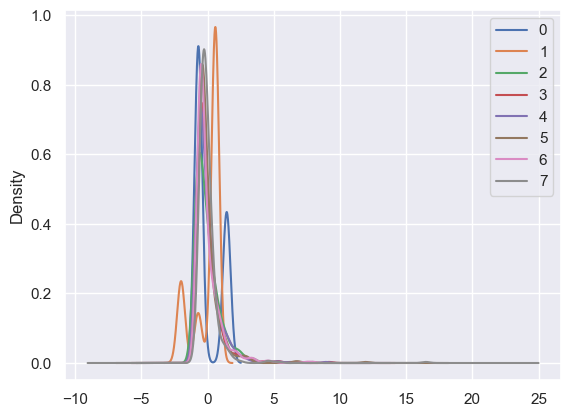

In [15]:
pd.DataFrame(scaled1).plot(kind='kde');

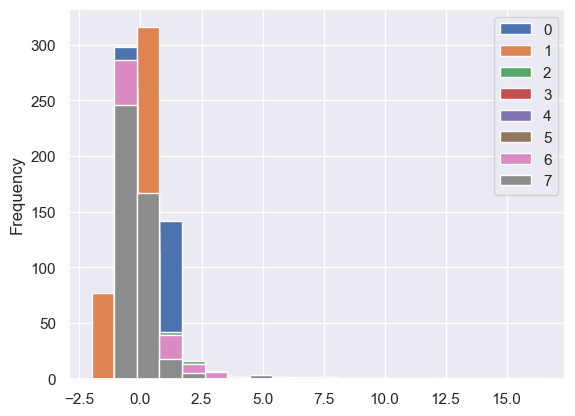

In [16]:
pd.DataFrame(scaled1).plot(kind='hist', bins=20);

In [17]:
# Using the StandardScaler, the values of all the features have been converted into a uniform range of the same scale.

#### MinMax Scaler

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaled2 = MinMaxScaler().fit_transform(wholesale)

pd.DataFrame(scaled2, columns=wholesale.columns).head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [19]:
pd.DataFrame(scaled2, columns=wholesale.columns).describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.070510,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.116790,0.058826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.027863,0.020124,0.023174,0.011788,0.006216,0.008453
50%,0.000000,1.000000,0.075802,0.048636,0.051225,0.024670,0.019927,0.020077
75%,1.000000,1.000000,0.150968,0.097154,0.114821,0.058005,0.095997,0.037907
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


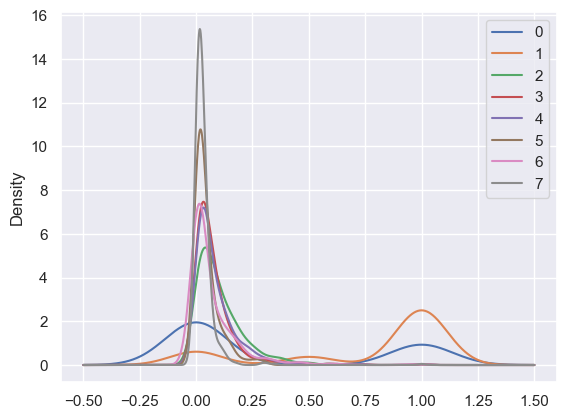

In [20]:
pd.DataFrame(scaled2).plot(kind='kde');

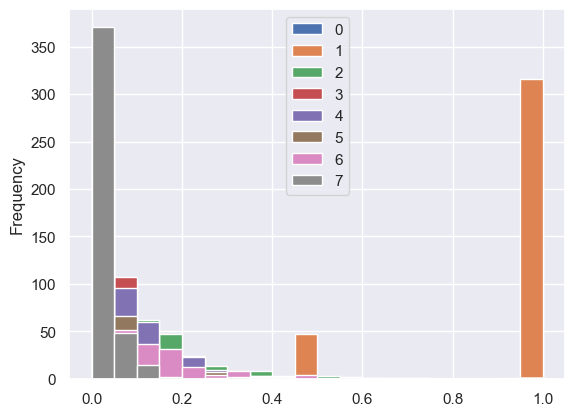

In [21]:
pd.DataFrame(scaled2).plot(kind='hist', bins=20);

In [22]:
#  After Scaling the data using Min Max Scalar, 
# the values of all the features have been converted into a uniform range of the same scale[0,1].

Since the data represent Gaussian distribution, Standardization is the best choice of scaling to proceed with. Also, the impact of outliers is very less in case of Standadized data when compared with Normalized data. 
Therefore, Standard Scaler is chosen here to proceed ahead with.

## Feature Selection

##### RFECV

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFECV

gbc = GradientBoostingClassifier() 
# here GradientBoostingClassifier is used as the estimator for rfecv

In [24]:
# initializing scaled dataframe
wholesale_scaled = pd.DataFrame(scaled1, columns=wholesale.columns)

In [25]:
X = wholesale_scaled.drop(['Channel'], axis=1)
y = wholesale['Channel']


In [26]:
rfecv = RFECV(estimator=gbc)
rfecv.fit(X ,y)

RFECV(estimator=GradientBoostingClassifier())

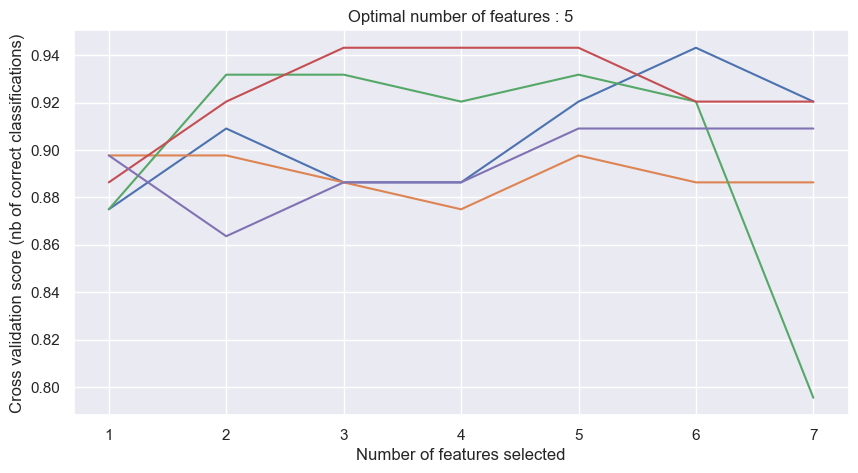

In [27]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

From the plot between Number of features selected vs Cross validation score, the optimal number of features to be used is 5.

In [28]:
rfecv_rank = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_rank.head(10)

,Rank
Milk,1
Grocery,1
Frozen,1
Detergents_Paper,1
Delicassen,1
Fresh,2
Region,3


After analysing the plot and the rank chart, features Milk, Grocery, Frozen, Detergents_Paper and Delicassen are chosen as the optimal features.

##  KMeans Clustering

In [29]:
from sklearn.cluster import KMeans

In [30]:
wcss = []
for i in range(2, 16): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) # iterate from range 2 to 16
    kmeans.fit(wholesale_scaled)  
    wcss.append(kmeans.inertia_)

#### Elbow Plot

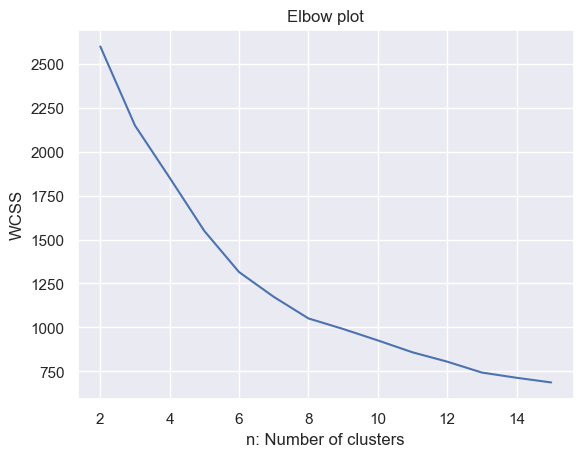

In [31]:
plt.plot(range(2, 16), wcss)
plt.title('Elbow plot')
plt.xlabel('n: Number of clusters')
plt.ylabel('WCSS')
plt.show()


In this elbow plot, the elbow point comes at around 6. So, our optimal number of clusters for the above data would be 6. Also in the figure, wcss decreases only slightly after 6.

In [32]:
kmeans6 = KMeans(n_clusters = 6)
ymeans = kmeans6.fit(wholesale_scaled)

In [33]:
ymeans

KMeans(n_clusters=6)

In [34]:
print('SSE: ', kmeans6.inertia_)
print('\nCentroids: \n', kmeans6.cluster_centers_)

SSE:  1314.9218179509749

Centroids: 
 [[-6.90297086e-01  5.90668285e-01 -2.26969330e-01 -3.81612608e-01
  -4.75234627e-01 -1.72435121e-01 -4.42861386e-01 -1.86419955e-01]
 [-5.90811099e-01 -1.58939862e+00 -1.17369902e-01 -3.50992288e-01
  -4.02741180e-01  1.33513200e-02 -4.22747572e-01 -1.62015752e-01]
 [ 1.44865163e+00  2.93864819e-03  3.88728973e-01  3.94304862e+00
   4.02164626e+00  3.57841274e-02  4.22611641e+00  9.41635735e-01]
 [-5.95232699e-01  3.03333796e-01  1.85960912e+00 -1.24058137e-01
  -2.57815536e-01  1.46400382e+00 -4.26267584e-01  4.13676499e-01]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]
 [ 1.44865163e+00  1.66562579e-01 -3.26341681e-01  4.22850268e-01
   6.59619766e-01 -3.57310160e-01  6.86224579e-01  4.36563167e-03]]


In [35]:
#count number of records in every cluster
pd.Series(kmeans6.labels_).value_counts()

0    172
5    125
1     86
3     45
2     11
4      1
dtype: int64

## PCA

In [36]:
from sklearn.decomposition import PCA

# PCA with first two components
pca2 = PCA(n_components=2)
pca2.fit(wholesale_scaled)
wholesale_pca2 = pca2.transform(wholesale_scaled)
print("Original shape: %s" % str(wholesale_scaled.shape))
print("Reduced shape: %s" % str(wholesale_pca2.shape))                

Original shape: (440, 8)
Reduced shape: (440, 2)


In [37]:
print(" Variance :",pca2.explained_variance_)
print(" Variance ratio :",pca2.explained_variance_ratio_)

 Variance : [3.10707136 1.79404441]
 Variance ratio : [0.38750123 0.22374588]


The principal component 1 holds 38.75% of the information while the principal component 2 holds only 22.37% of the information.

In [38]:
# PCA with first four components
pca4 = PCA(n_components=4)
pca4.fit(wholesale_scaled)
wholesale_pca4 = pca4.transform(wholesale_scaled)
print("Original shape: %s" % str(wholesale_scaled.shape))
print("Reduced shape: %s" % str(wholesale_pca4.shape))

Original shape: (440, 8)
Reduced shape: (440, 4)


In [39]:
print(" Variance :",pca4.explained_variance_)
print(" Variance ratio :",pca4.explained_variance_ratio_)

 Variance : [3.10707136 1.79404441 1.0140786  0.74007428]
 Variance ratio : [0.38750123 0.22374588 0.12647173 0.09229904]


From the above output, we can observe that the principal component 1 holds 38.75% of the information, the principal component 2 holds 22.37% , principal component 3 holds 12.64% and principal component 4 holds 9.22% of the information.

<Figure size 1500x1000 with 0 Axes>

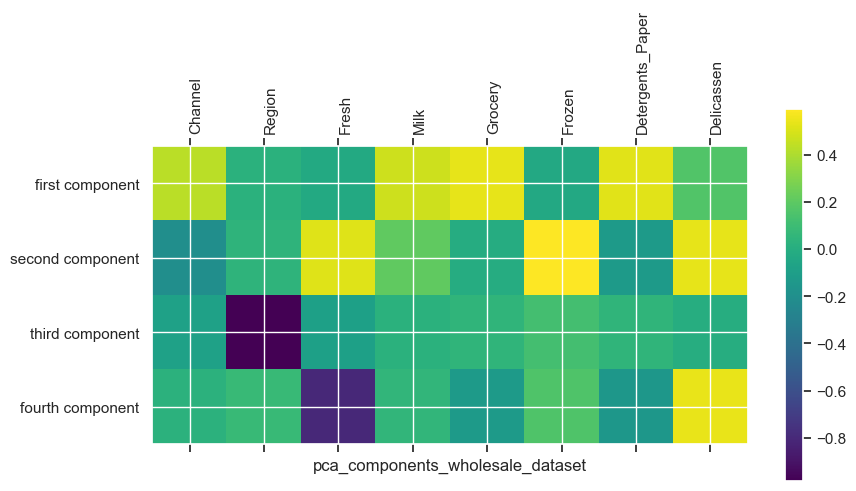

In [40]:
nfeat = 8
plt.figure(figsize=(15, 10))
plt.matshow(pca4.components_[:,:nfeat], cmap='viridis')
plt.yticks([0,1,2,3],["first component", "second component","third component","fourth component"])
plt.colorbar()
plt.xticks(range(nfeat),
           wholesale.columns[:nfeat], rotation=90, ha='left');
plt.xlabel("pca_components_wholesale_dataset");

<AxesSubplot:>

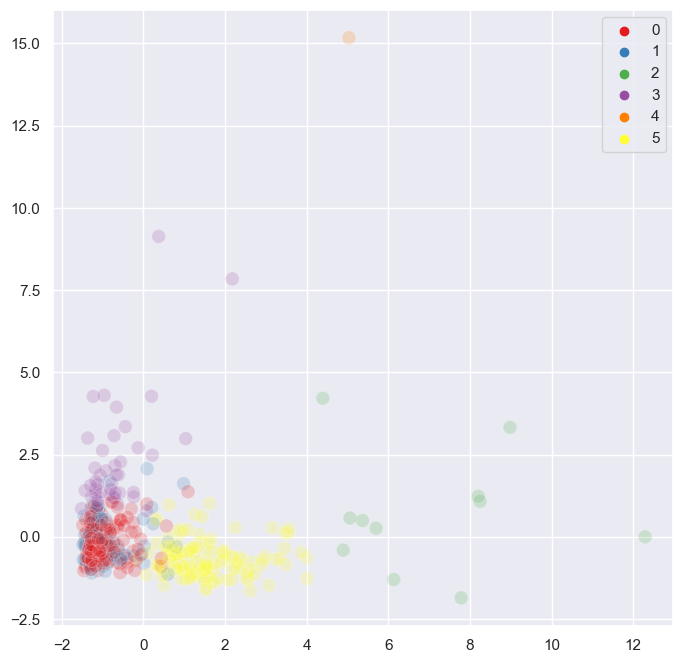

In [41]:
plt.figure(figsize=(8, 8))
sns.scatterplot(wholesale_pca4[:, 0], wholesale_pca4[:, 1], hue=ymeans.labels_, 
                palette='Set1',
                s=100, alpha=0.2)

The above graph visualize 6 clusters derived from kmeans.

## XGBoost  with 5 Fold CV

In [42]:
pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

In [44]:
xg = XGBClassifier(eval_metric='mlogloss')
kfold = KFold(n_splits=5)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [46]:
xg.fit(X_train, y_train)

XGBClassifier(eval_metric='mlogloss')

In [47]:
y_pred = xg.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

print('XGBoost_Accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost_Accuracy score: 0.9261


In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.93      0.95       124
           2       0.84      0.92      0.88        52

    accuracy                           0.93       176
   macro avg       0.90      0.93      0.91       176
weighted avg       0.93      0.93      0.93       176



In [50]:
# performance metrics using 5 fold cross validation # use from xgboost import cv

from sklearn.model_selection import cross_val_score

PW      = cross_val_score(xg, X, y, cv=kfold, scoring='precision_weighted')
Rscore  = cross_val_score(xg, X, y, cv=kfold, scoring='recall_weighted')
results = cross_val_score(xg, X, y, cv=kfold)

In [51]:
Accuracy  = results.mean()*100
Recall    = round((Rscore.mean()*100),3)
Precision = round((PW.mean()*100),3)

f1score   = round(2*((Recall*Precision)/(Recall+Precision)),3)

In [52]:
print("Accuracy= %f, Recall=%f, Precision=%f, f1score=%f" % (Accuracy,Recall,Precision,f1score))

Accuracy= 90.909091, Recall=90.909000, Precision=91.612000, f1score=91.259000


Observation:
* Accuracy , Recall, Precision, and f1score decreased slightly when 5 fold cross validation is used.